In [ ]:
pip install ucimlrepo


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
# Combine features and target into one DataFrame
df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)

# Save as CSV
df.to_csv("heart_disease.csv", index=False)

print("✅ Dataset saved as heart_disease.csv")

✅ Dataset saved as heart_disease.csv


In [ ]:
# Display the first 5 rows of the DataFrame
display(df.head())

# Check for missing values
display(df.isnull().sum())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Impute missing values in 'ca' and 'thal' with the mode
for column in ['ca', 'thal']:
    df[column].fillna(df[column].mode()[0], inplace=True)

display(df.isnull().sum())

/tmp/ipython-input-1201168221.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Identify categorical columns (excluding the target variable 'num')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# The variable information indicates that 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', and 'thal' are categorical.
# Let's manually define them based on the variable information as select_dtypes might not catch all of them if they are integers.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,age,trestbps,chol,thalach,oldpeak,num,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67,160,286,108,1.5,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67,120,229,129,2.6,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37,130,250,187,3.5,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41,130,204,172,1.4,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target variable 'num' and the already encoded categorical columns)
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('num') # Remove the target variable

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,age,trestbps,chol,thalach,oldpeak,num,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


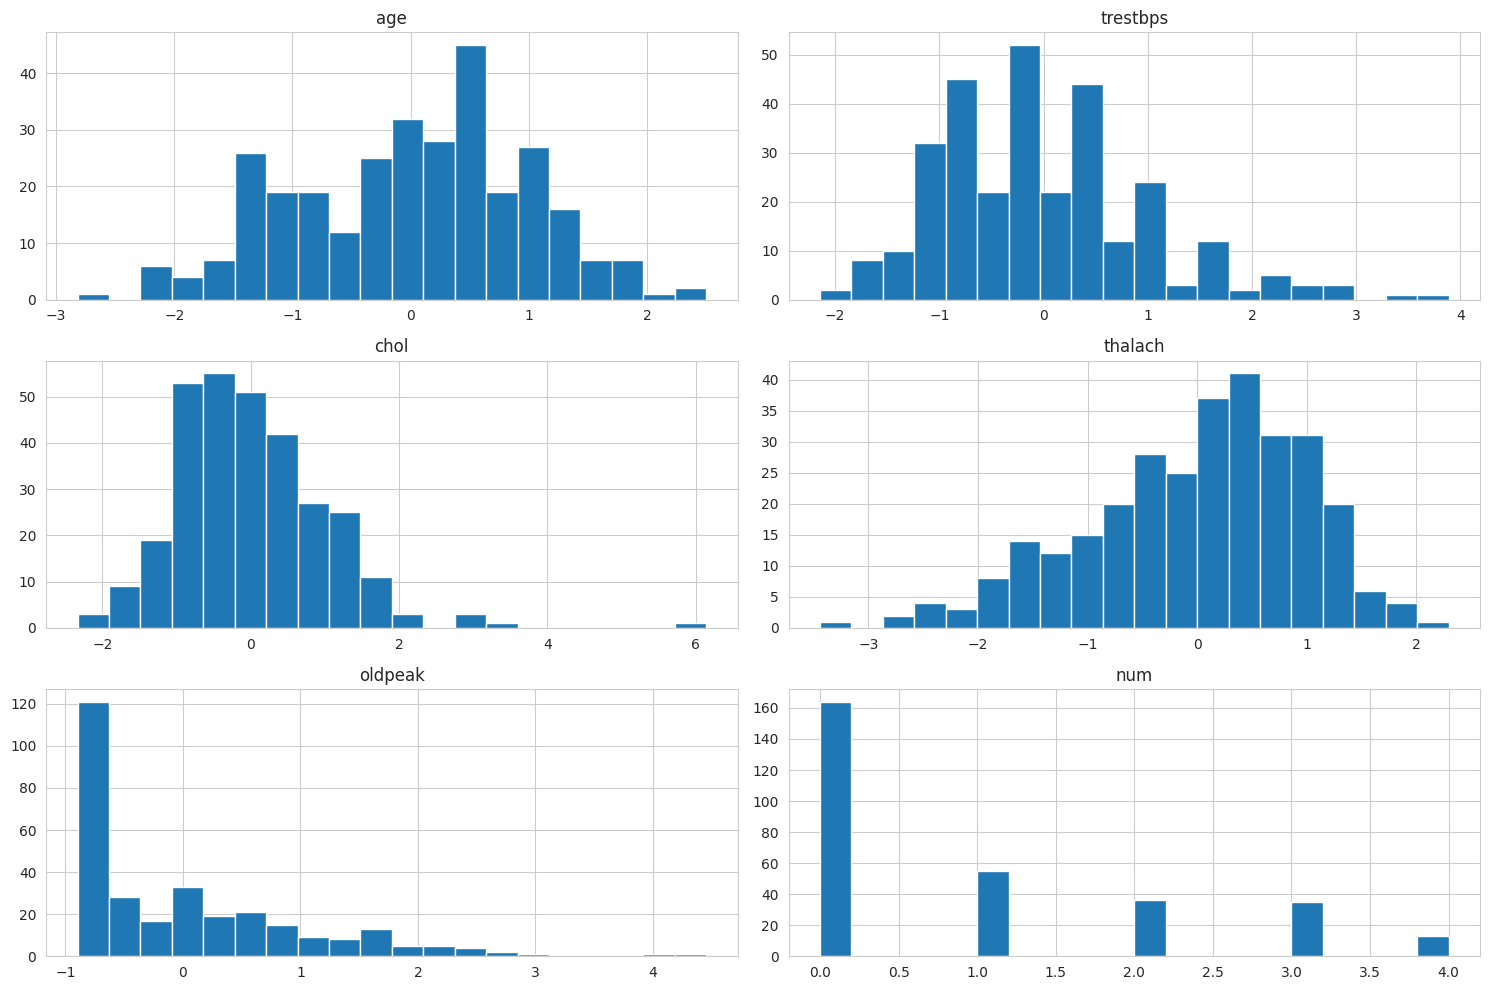

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Histograms for numerical features
df_encoded.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

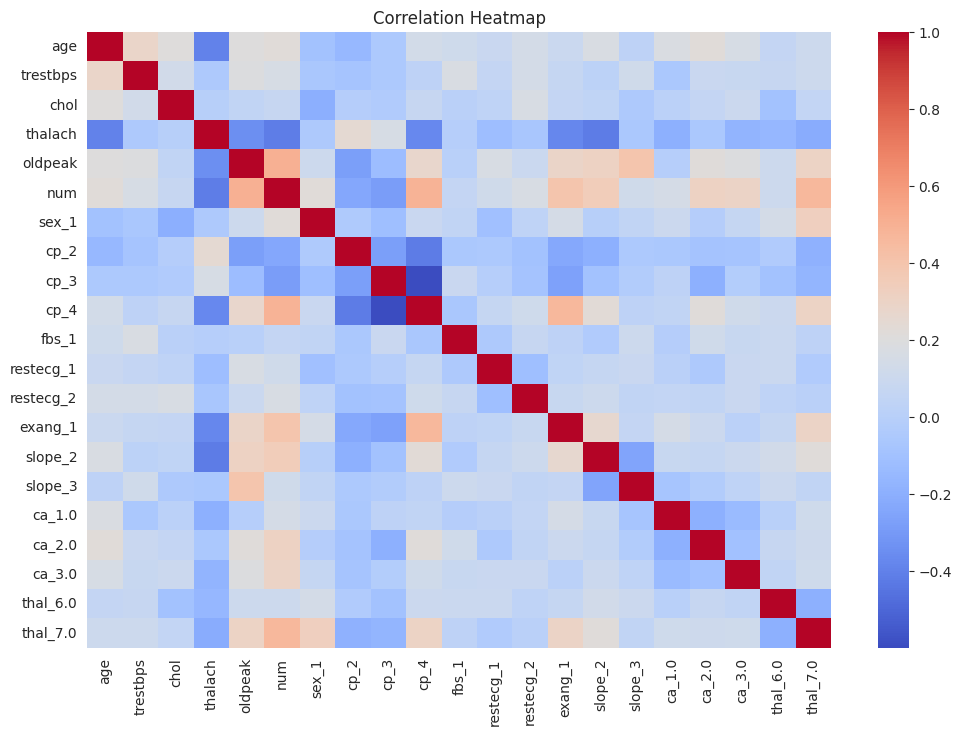

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

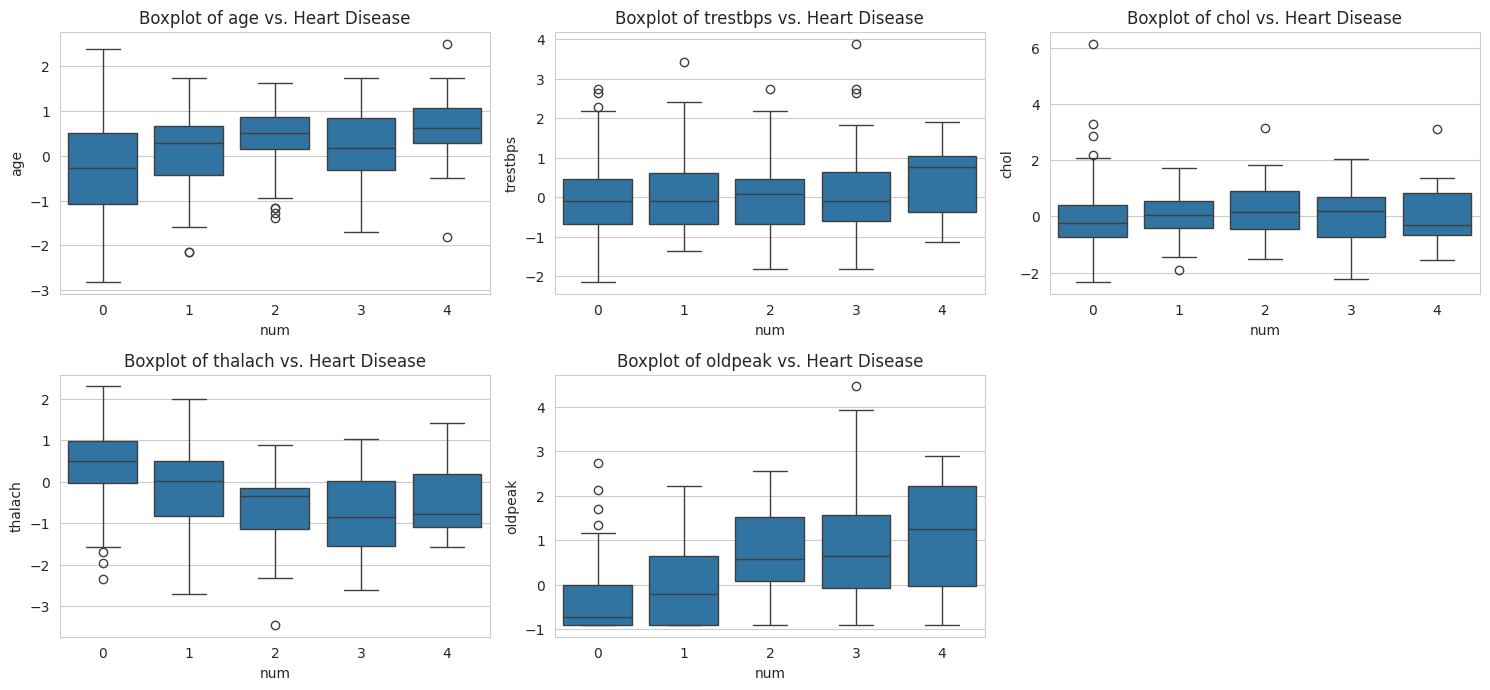

In [ ]:
# Boxplots for numerical features
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('num') # Remove the target variable

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='num', y=col, data=df_encoded)
    plt.title(f'Boxplot of {col} vs. Heart Disease')
plt.tight_layout()
plt.show()